In [25]:
!pip install pandas
!pip install requests
!pip install lxml
!pip install html5lib
!pip install beautifulsoup4
!pip install matplotlib

In [26]:
import yfinance as yf
import pandas as pd

In [29]:
import yfinance as yf

# Créer l’objet Ticker pour Tesla
tesla = yf.Ticker('TSLA')

# Télécharger les données historiques
tesla_data = tesla.history(period="max")

# Réinitialiser l’index
tesla_data.reset_index(inplace=True)

# Afficher les 5 premières lignes
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [37]:
url_tesla = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url_tesla).text

# Parser avec BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Extraire le tableau des revenus Tesla
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Trouver toutes les tables
tables = soup.find_all('table')

# Parcourir les lignes du tableau (première table trouvée)
for table in tables:
    for row in table.find_all('tr')[1:]:  # Ignorer l'en-tête
        col = row.find_all('td')
        if len(col) == 2:
            date = col[0].text.strip()
            revenue = col[1].text.strip()
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
                "Date": [date], 
                "Revenue": [revenue]
            })], ignore_index=True)
    
    if len(tesla_revenue) > 0:
        break

# Nettoyer la colonne Revenue (enlever $ et virgules)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',', '').str.replace('$', '')

# Supprimer les lignes vides
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [40]:
gamestop = yf.Ticker("GME")

# Extraire les données historiques
gme_data = gamestop.history(period="max")

# Réinitialiser l'index
gme_data.reset_index(inplace=True)

gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [42]:
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url_gme).text

# Parser avec BeautifulSoup
soup2 = BeautifulSoup(html_data_2, 'html.parser')

# Extraire le tableau des revenus GameStop
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Trouver toutes les tables
tables2 = soup2.find_all('table')

# Parcourir les lignes du tableau
for table in tables2:
    for row in table.find_all('tr')[1:]:  # Ignorer l'en-tête
        col = row.find_all('td')
        if len(col) == 2:
            date = col[0].text.strip()
            revenue = col[1].text.strip()
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({
                "Date": [date], 
                "Revenue": [revenue]
            })], ignore_index=True)
    
    if len(gme_revenue) > 0:
        break

# Nettoyer la colonne Revenue (enlever $ et virgules)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',', '').str.replace('$', '')

# Supprimer les lignes vides
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


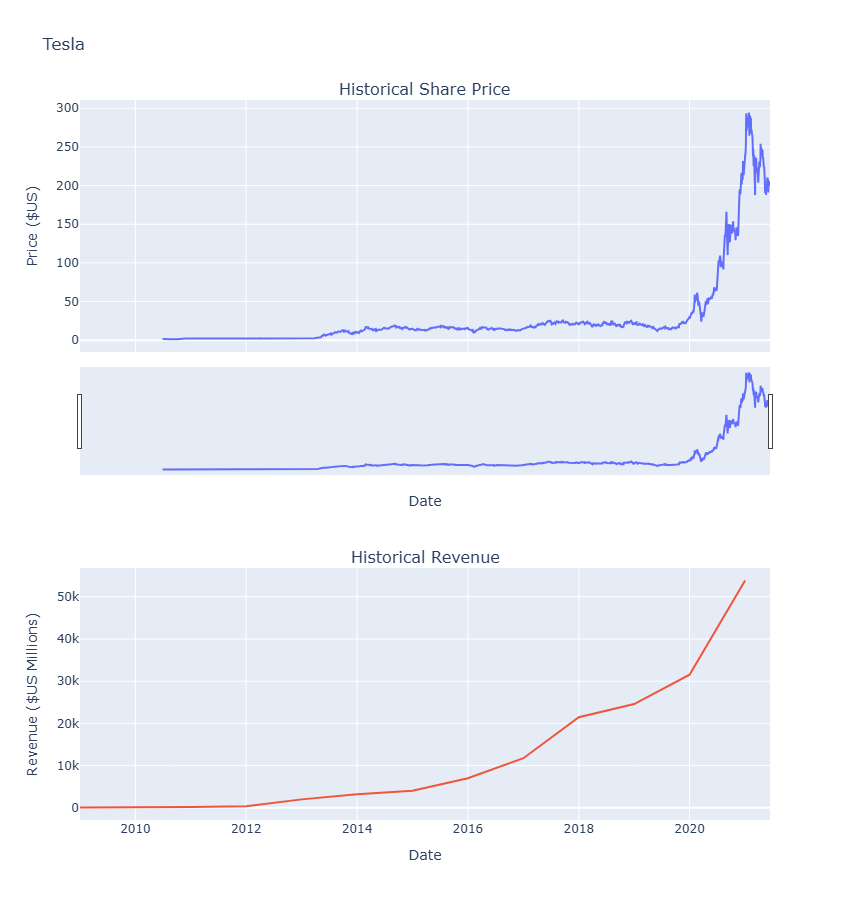

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# ========== QUESTION 5: Plot Tesla Stock Graph ==========

# Préparer les données Tesla
tesla_data_graph = tesla_data.copy()
tesla_revenue_graph = tesla_revenue.copy()

# S'assurer que Date est une colonne
tesla_data_graph.reset_index(inplace=True)

# Convertir les dates
tesla_data_graph['Date'] = pd.to_datetime(tesla_data_graph['Date'])
tesla_revenue_graph['Date'] = pd.to_datetime(tesla_revenue_graph['Date'])

# Convertir Revenue en numérique
tesla_revenue_graph['Revenue'] = pd.to_numeric(tesla_revenue_graph['Revenue'], errors='coerce')

# Filtrer jusqu'à juin 2021
tesla_stock_filtered = tesla_data_graph[tesla_data_graph['Date'] <= '2021-06-14'].copy()
tesla_revenue_filtered = tesla_revenue_graph[tesla_revenue_graph['Date'] <= '2021-04-30'].copy()

# Créer le graphique
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    subplot_titles=("Historical Share Price", "Historical Revenue"),
    vertical_spacing=0.3
)

# Ajouter le prix de l'action
fig.add_trace(
    go.Scatter(
        x=tesla_stock_filtered['Date'],
        y=tesla_stock_filtered['Close'],
        name="Share Price",
        mode='lines'
    ),
    row=1, col=1
)

# Ajouter les revenus
fig.add_trace(
    go.Scatter(
        x=tesla_revenue_filtered['Date'],
        y=tesla_revenue_filtered['Revenue'],
        name="Revenue",
        mode='lines'
    ),
    row=2, col=1
)

# Configuration des axes
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

# Configuration générale
fig.update_layout(
    showlegend=False,
    height=900,
    title="Tesla",
    xaxis_rangeslider_visible=True
)

fig.show()

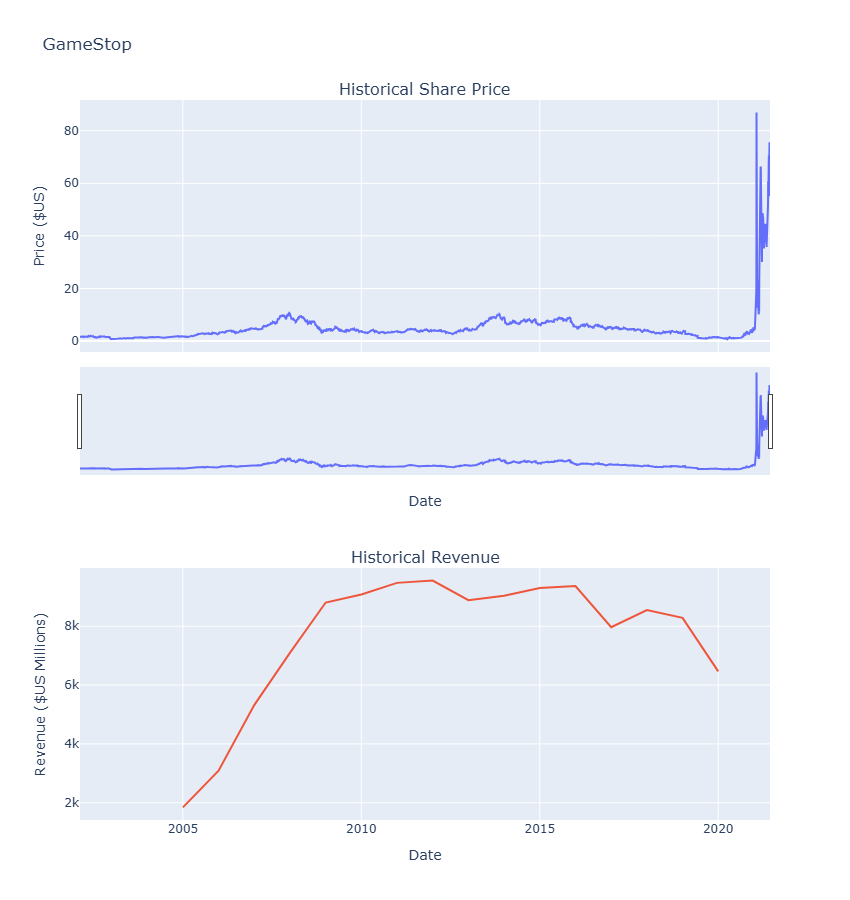

In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# ========== QUESTION 6: Plot GameStop Stock Graph ==========

# Préparer les données GameStop
gme_data_graph = gme_data.copy()
gme_revenue_graph = gme_revenue.copy()

# S'assurer que Date est une colonne
gme_data_graph.reset_index(inplace=True)

# Convertir les dates
gme_data_graph['Date'] = pd.to_datetime(gme_data_graph['Date'])
gme_revenue_graph['Date'] = pd.to_datetime(gme_revenue_graph['Date'])

# Convertir Revenue en numérique
gme_revenue_graph['Revenue'] = pd.to_numeric(gme_revenue_graph['Revenue'], errors='coerce')

# Filtrer jusqu'à juin 2021
gme_stock_filtered = gme_data_graph[gme_data_graph['Date'] <= '2021-06-14'].copy()
gme_revenue_filtered = gme_revenue_graph[gme_revenue_graph['Date'] <= '2021-04-30'].copy()

# Créer le graphique
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    subplot_titles=("Historical Share Price", "Historical Revenue"),
    vertical_spacing=0.3
)

# Ajouter le prix de l'action
fig.add_trace(
    go.Scatter(
        x=gme_stock_filtered['Date'],
        y=gme_stock_filtered['Close'],
        name="Share Price",
        mode='lines'
    ),
    row=1, col=1
)

# Ajouter les revenus
fig.add_trace(
    go.Scatter(
        x=gme_revenue_filtered['Date'],
        y=gme_revenue_filtered['Revenue'],
        name="Revenue",
        mode='lines'
    ),
    row=2, col=1
)

# Configuration des axes
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

# Configuration générale
fig.update_layout(
    showlegend=False,
    height=900,
    title="GameStop",
    xaxis_rangeslider_visible=True
)

fig.show()